<a href="https://colab.research.google.com/github/TamaDioo/Pembelajaran-Mesin/blob/main/TG1_JS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 4 - Klasterisasi

Nama: Dio Andika Pradana Mulia Tama

NIM: 2341720098

Kelas: TI-3F

# Praktikum 1

## Pengantar
Pada modul praktikum ini, kita akan langsung mempraktikkan pembuatan model K-Means dengan menggunakan python. Kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris.

## Langkah 1 - Import Library
Import library yang dibutuhkan

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Langkah 2 - Load dan Inspeksi Data
Pada tahap ini, kita akan memuat data ke dalam dataframe kemudian melakukan inspeksi data untuk 5 data pertama.


In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Selanjutnya, lakukan inspeksi profile data,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Didapatkan informasi bahwa terdapat 150 data dan tidak ada missing values pada seluruh variabel.

## Langkah 3 - Seleksi Fitur
Dikarenakan kita hanya membutuhkan fitur untuk proses klasterisasi, maka kita perlu memisahkan antara fitur dan label dengan menggunakan proses slicing data.

In [ ]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

Jika Anda perhatikan pada baris ke-2, index slicing yang digunakan adalah `[:,1:-1]`, artinya kolom `Id` dan `Species` (label) tidak digunakan.

Cek data fitur dengan cara,



In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


## Langkah 4 - Plotting
Pada tahap ini, kita akan melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu `SepalLengthCm` dan `SepalWidthCm`.

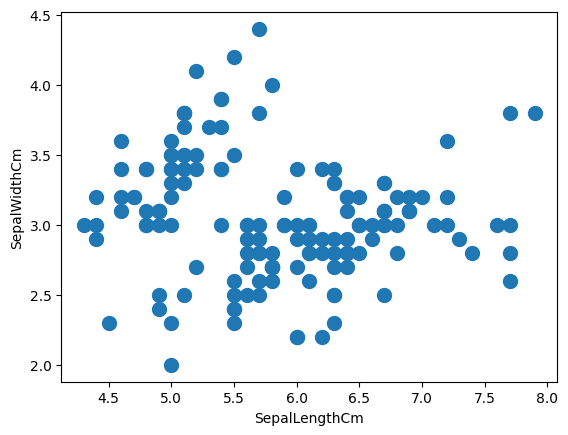

In [ ]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Jika diperhatikan secara visual, kita mungkin dapat berasumsi bahwa terdapat dua _cluster_ pada data.

## Langkah 5 - Membuat Model K-Means
Selanjutnya, kita akan membuat model K-Means dengan asumsi terdapat dua _cluster_ sesuai dengan amatan visual pada scatterplot.

In [ ]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

Setelah model mempelajari data yang kita miliki melalui fungsi `fit_predict()`, kita dapat melakukan pengecekan hasil klasterisasi dengan memanfaatkan scatterplot.

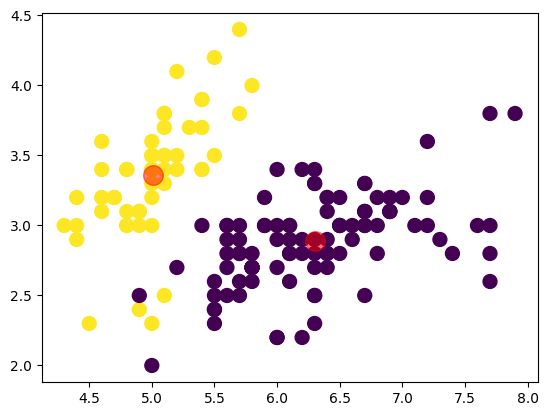

In [ ]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Langkah 6 - Evaluasi Model
Untuk mengetahui apakah model klasterisasi yang dihasilkan memiliki performa yang baik, maka kita akan melakukan proses evaluasi. Nilai metrik evaluasi yang dapat kita gunakan salah satunya adalah __sum of square error (SSE)__. Untuk mendapatkan nilai SSE, kita cukup mengakses properti `inertia_` dari objek K-Means yang telah dilatih sebelumnya.

In [ ]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


NB: Anda mungkin mendapatkan nilai yang berbeda. ___Ingat, titik centroid awal ditentukan pada lokasi yang acak!___

## Langkah 7 - Menentukan k terbaik dengan Elbow Method
Pada pembuatan model klasterisasi, jika kita masih belum menentukan jumlah cluster yang akan digunakan, maka kita dapat menggunakan _elbow method_ untuk mendapatkan jumlah cluster yang terbaik. Cara kerja elbow method cukup sederhana, yaitu,
1. Tentukan rentang k yang ingin dievaluasi.
2. Kalkulasi nilai SSE untuk setiap nilai k pada rentang yang telah ditentukan.
3. Buat grafik _lineplot_ untuk mendapatkan visualisasi sebagai dasar justifikasi.

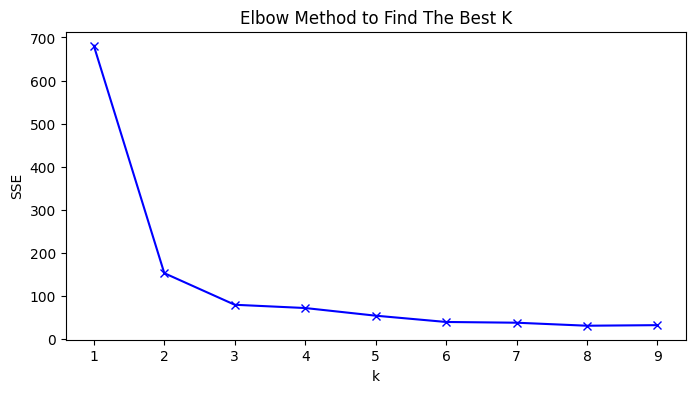

In [ ]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Berdasarkan hasil lineplot SSE untuk setiap k, maka kita dapat berargumen bahwa nilai k terbaik adalah 3. Mengapa k = 3? Hal ini dikarenakan pada nilai k = 2 nilai SSE masih terlalu tinggi dibandingkan dengan k = 4, sedangkan, misal k = 8 sangat rendah. __Jumlah cluster terbaik bukan karena nilai SSE yang rendah__. SSE pasti aka semakin mengecil seiring dengan jumlah cluster yang dihasilkan. Hal ini dikarenakan jumlah anggota tiap cluster juga semakin mengecil dan cluster otomatis lebih sempit. __Dalam konteks ini, kita harus dapat menemukan posisi dimana nilai k telah turun dengan tajam diikuti dengan penurunan yang lebih stabil__. Posisi inilah yang dikenal dengan posisi "elbow". Dalam konteks fitur yang kita gunakan saat ini, nilai k = 3 menjadi nilai yang paling optimal.

# Praktikum 2

## Pengantar
Pada pratikum sebelumnya kita telah mengetahui proses klasterisasi dengan menggunakan metode KMeans. Kebetulan, data yang digunakan dapat dengan mudah dipisahkan secara linear. Bagaimana jika data tidak dalam bentuk sebaran yang dapat dipisahkan secara linier (setidaknya pada visualisasi 2 dimensi)?

KMeans tidak dapat melakukan tugas ini dengan baik. Oleh karena itu, pada praktikum ini, kita akan menggunakan algoritma DBSCAN untuk melakukan klasterisasi pada data non-linear.

## Langkah 0 - Import Library
Import library yang dibutuhkan

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Langkah 1 - Membuat Dataset Sintentis
Kali ini kita akan membuat data sintentis untuk tujuan pembelajaran. Data yang akan kita buat akan berbentuk spiral untuk menyimulasikan kondisi non linear.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

Lakukan proses plotting data untuk mengetahui hasil dataset yang telah dibuat.

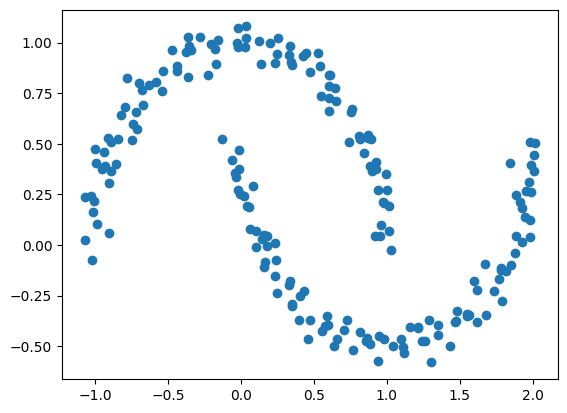

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

Jika diamati secara visual, terdapat dua cluster di dalam dataset. Namun apakah KMeans dapat bekerja dengan baiki dalam kasus ini, mari kita buktikan.

## Langkah 2 - Klasterisasi dengan K-Means
Buat model KMeans dan lakukan plotting ulang hasil klasterisasi

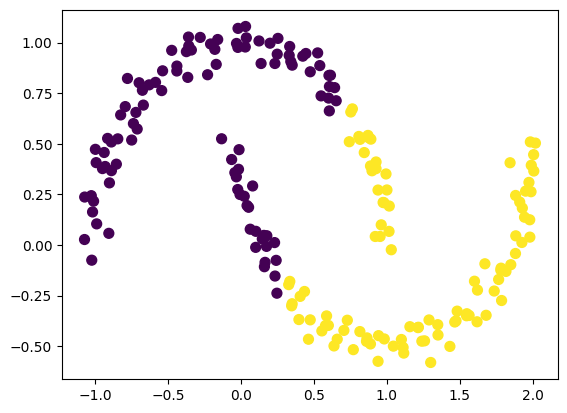

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Terdapat beberapa data yang tidak terklasterisasi secara tepat. Anda dapat dengan mudah membayangkan garis imager linear yang digunakan untuk memisahkan 2 cluster data. Lakukan evaluasi lebih lanjut dengan menggunakan _silhouette coefficient_.

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


Nilai ini menunjukkan bahwa data tidak terklasterisasi dengan cukup baik.

## Langkah 3 - Klasterisasi dengan DBSCAN
Selanjutnya, kita akan melakukan klasterisasi dengan DBSCAN. ___Ingat, DBSCAN sangat sensitif terhadap parameter epsilon dan minimal sampel!___

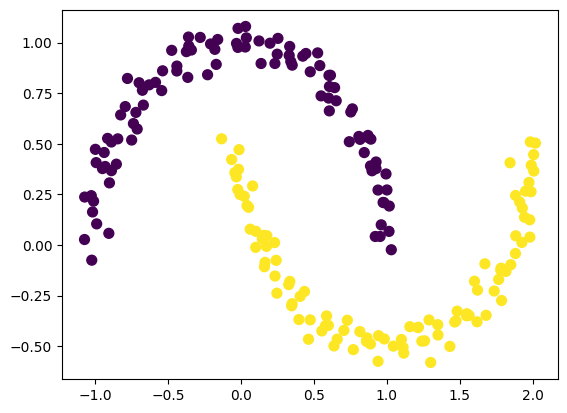

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Berdasarkan scatterplot, data dapat terklasterisasi dengan sangat baik. Untuk memastikannya, kita perlu melakukan evaluasi kembali dengan _silhouette score_.

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Hasil 0.32585318950197517

0.32585318950197517


Hasil silhouette score menunjukkan hasil yang tidak optimal. Padahal cluster terbentuk dengan baik secara visual. Mengapa demikian? Silhouette coefficient berasumsi cluster dapat terpisah dengan baik dalam bentuk linier, sehingga jika bentuknya distribusi data acak, evaluasi silhouette coefficient tidak dapat bekerja dengan baik. Lalu evaluasi apa yang bisa kita lakukan? Secara sederhana,
1. Prosentase data noise
2. Inspeksi visual

Secara metric dapat menggunakan,
1. Davies-Bouldin Index (DBI) --> __fokus pada separasi indeks, semakin kecil semakin baik, rentang 0 hingga tak hingga.__

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# Praktikum 3

## Pengantar
Klasterisasi tidak hanya dapat digunakan pada data tabular. Pada konteks citra, kita dapat menggunakan klasterisasi untuk mengidentifkasi kesamaan warna dari sebuah citra sehingga kita mendapatkan area-area tertentu untuk identifikasi lebih lanjut. Kasus lainnya adalah kompresi warna citra. Pada kompresi warna citra, kita akan meminimalkan penggunaan rentang citra untuk mendapatkan citra dengan ukuran data yang lebih rendah.



## Langkah 0 - Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Langkah 1 - Load Data Citra
Kita akan mencoba menggunakan 1 data citra dari dataset yang telah disediakan

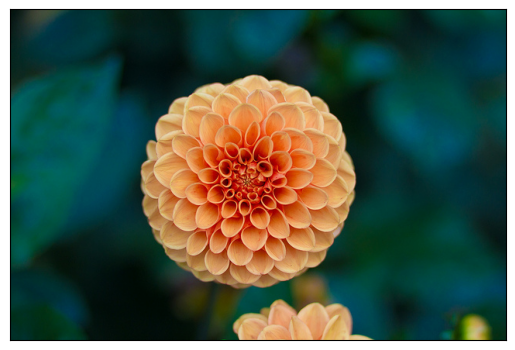

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

## Langkah 2 - Preprocessing
Selanjutnya kita akan melakukan pengecekan ukuran citra dan normalisasi warna

In [ ]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


## Langkah 3 - Cek Sebaran Warna
Buat fungsi berikut,

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Panggil fungsi untuk mengetahui sebaran warna,

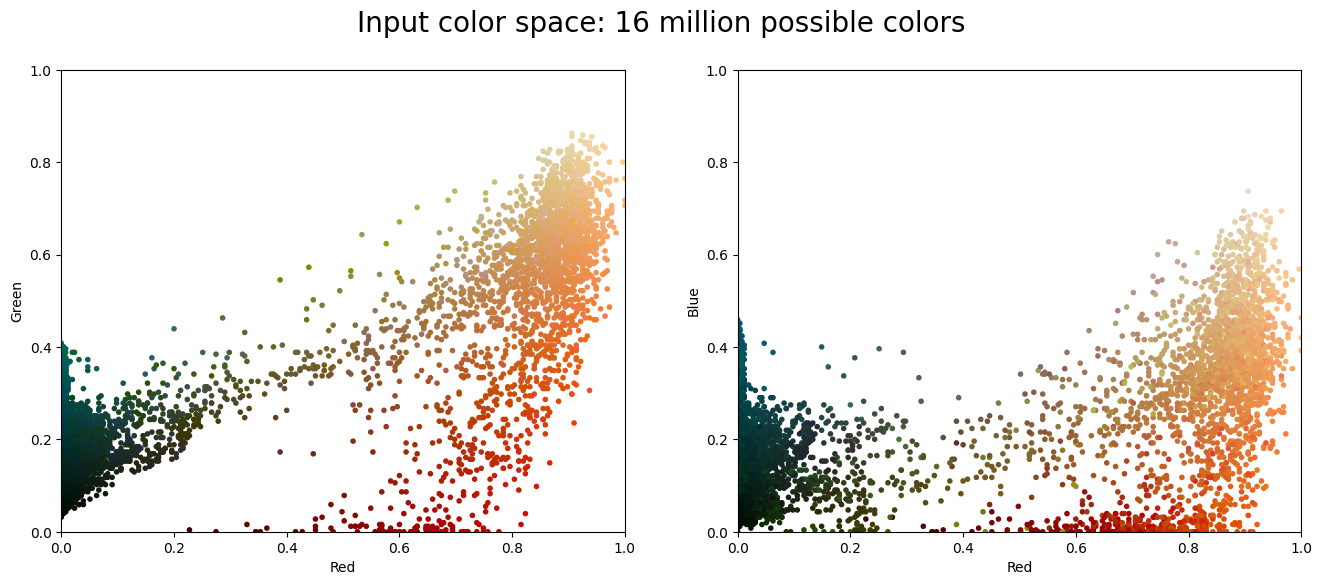

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## Langkah 4 - Klasterisasi Warna
Pada tahap ini kita akan melakukan klasterisasi hanya dengan 16 warna saja.

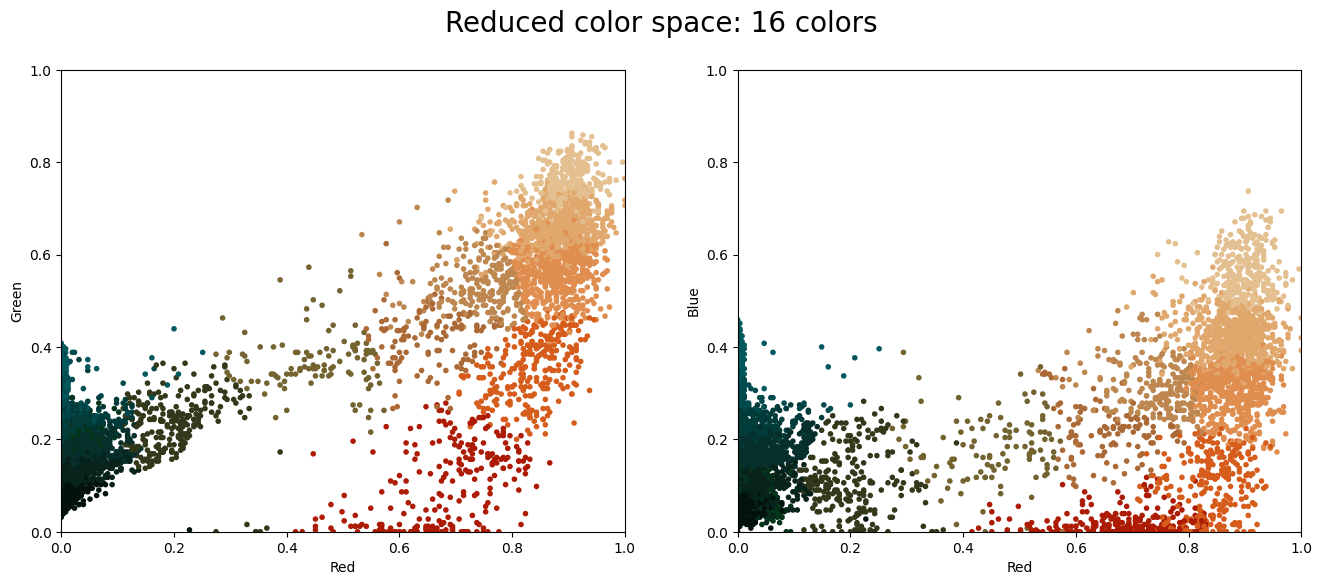

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Hasil perbandingan warna citra sebelum dan setelah kompresi adalah sebagai berikut,

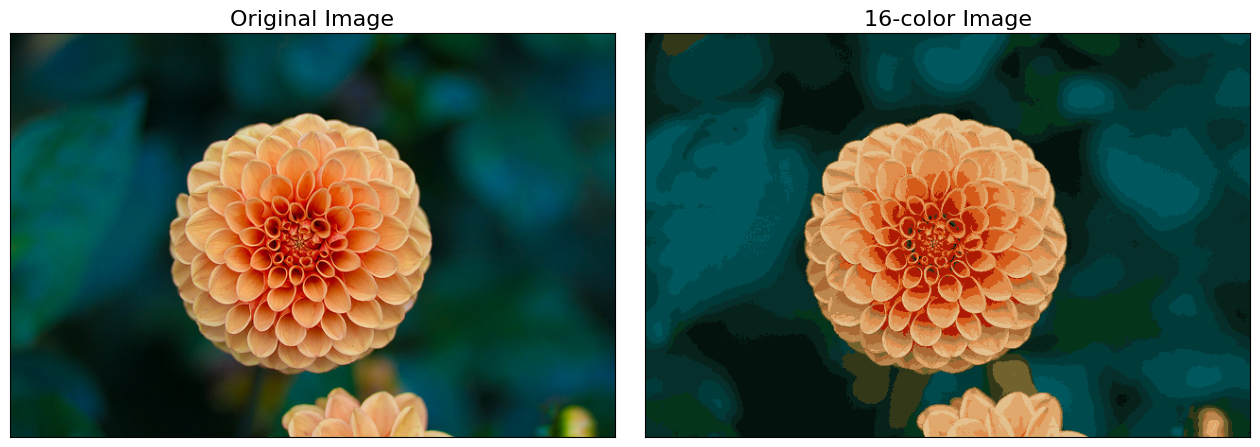

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

#Tugas Praktikum
Klasterisasi Data Nasabah Kartu Kredit
1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu `Avg_Credit_Limit` dan `Total_credit_card`. Apakah sebaran data dapat dikatakan linier?




In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load data
df_customers = pd.read_csv('CC_Customer_Dataset.csv')
df_customers.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# Menyiapkan data untuk scatterplot
X_scatter = df_customers[['Avg_Credit_Limit', 'Total_Credit_Cards']]

X_clustering = df_customers.select_dtypes(include=np.number).drop(['Sl_No', 'Customer Key'], axis=1)

display(X_scatter.head())
display(X_clustering.head())

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
1,50000,3
2,50000,7
3,30000,5
4,100000,6


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


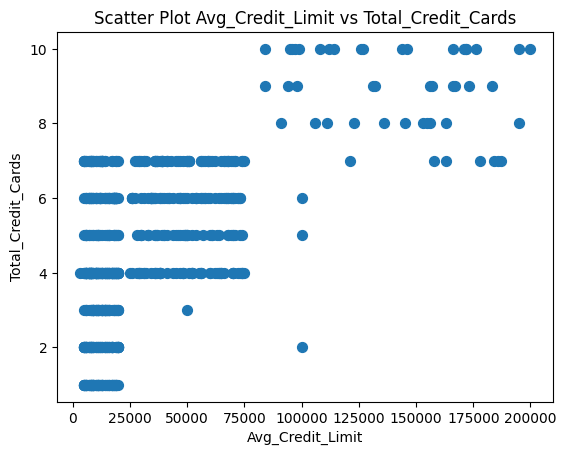

In [ ]:
# Membuat scatterplot menggunakan Avg_Credit_Limit and Total_credit_card
# untuk memeriksa distribusi data secara visual dan menilai linearitas.
plt.scatter(X_scatter['Avg_Credit_Limit'], X_scatter['Total_Credit_Cards'], s = 50)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Scatter Plot Avg_Credit_Limit vs Total_Credit_Cards')
plt.show()

Ternyata sebaran datanya tidak linier karena titik-titik data tersebar dan tidak membentuk pola garis lurus yang linier.

2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah k yang terbaik dengan menggunakan __elbow method__. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

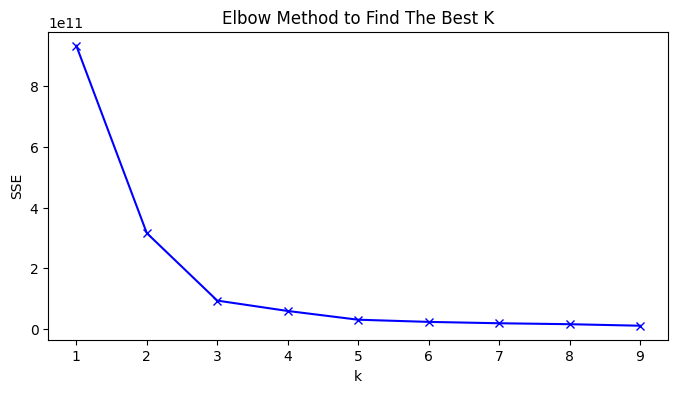

In [ ]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_customers = scaler.fit_transform(df_customers)

# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 10
K = range(1, 10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X_clustering)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Berdasarkan hasil linechart SSE untuk setiap k, maka nilai k terbaik adalah 3. Hal ini dikarenakan pada nilai k = 2 nilai SSE masih terlalu tinggi dibandingkan dengan k = 4, sedangkan, misal k = 8 sangat rendah. Jumlah cluster terbaik bukan karena nilai SSE yang rendah. SSE pasti akan semakin mengecil seiring dengan jumlah cluster yang dihasilkan. Hal ini dikarenakan jumlah anggota tiap cluster juga semakin mengecil dan cluster otomatis lebih sempit. Dalam konteks ini, kita harus dapat menemukan posisi dimana nilai k telah turun dengan tajam diikuti dengan penurunan yang lebih stabil. Posisi inilah yang dikenal dengan posisi "elbow". Jadi, nilai k = 3 menjadi nilai yang paling optimal.

In [ ]:
# Initiate K-Means object with numbur of cluster is 3
kmeans = KMeans(n_clusters=3)

# Fit and predict
kmeans_labels = kmeans.fit_predict(X_clustering)

3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.

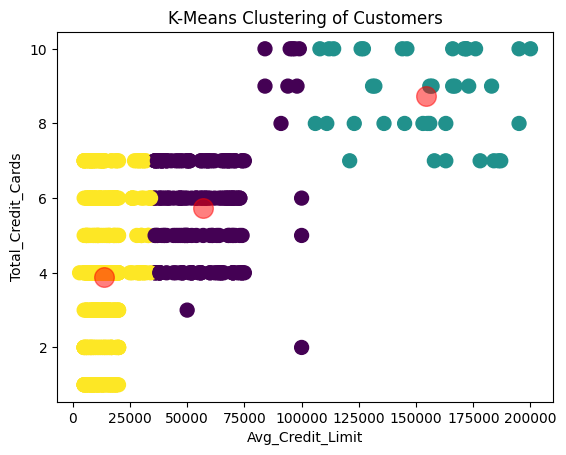

In [ ]:
# Plot the clustering result
plt.scatter(X_clustering.iloc[:, 0], X_clustering.iloc[:, 1], s = 100, c=kmeans_labels)

# Plot the centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('K-Means Clustering of Customers')
plt.show()

4. Buatlah model klasterisasi dengan menggunakan DBSCAN ___dengan seluruh variabel yang dapat digunakan___.

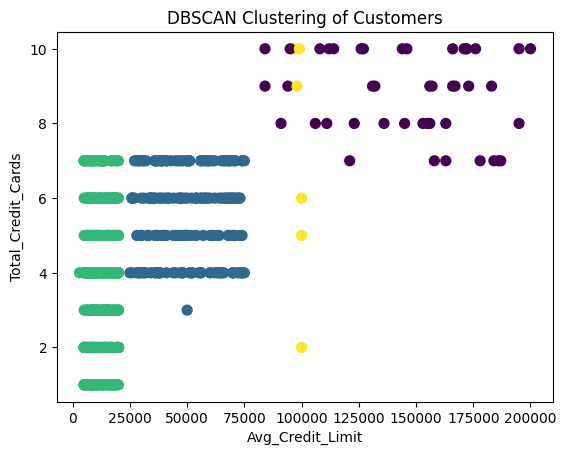

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2500, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_clustering)

plt.scatter(X_clustering.iloc[:, 0], X_clustering.iloc[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('DBSCAN Clustering of Customers')
plt.show()

5. Tentukan jumlah k yang terbaik dengan menggunakan __elbow method__. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

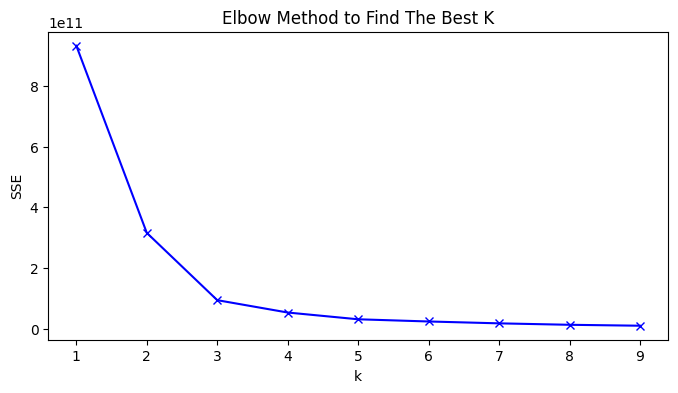

In [ ]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 10
K = range(1, 10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X_clustering)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Berdasarkan hasil linechart SSE untuk setiap k, maka nilai k terbaik adalah 3. Hal ini dikarenakan pada nilai k = 2 nilai SSE masih terlalu tinggi dibandingkan dengan k = 4, sedangkan, misal k = 8 sangat rendah. Jumlah cluster terbaik bukan karena nilai SSE yang rendah. SSE pasti akan semakin mengecil seiring dengan jumlah cluster yang dihasilkan. Hal ini dikarenakan jumlah anggota tiap cluster juga semakin mengecil dan cluster otomatis lebih sempit. Dalam konteks ini, kita harus dapat menemukan posisi dimana nilai k telah turun dengan tajam diikuti dengan penurunan yang lebih stabil. Posisi inilah yang dikenal dengan posisi "elbow". Jadi, nilai k = 3 menjadi nilai yang paling optimal.

6. Tentukan nilai silhouette score dan DBI dari model DBSCAN.

In [ ]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(X_clustering, dbscan_labels)
print(f"Silhouette Score: {ss}")

Silhouette score: 0.6455379217603352


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X_clustering, dbscan_labels)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 0.5211851764339389
